# Plan

Suposiciones: 
- Vamos a implementar esta solución a GCP
- El proceso de extracción es finito y no dura más de 9 min
- El proceso es ejecutado con una frecuencia fija

Vamos considerar la suposiones para la arquitectur propuesta

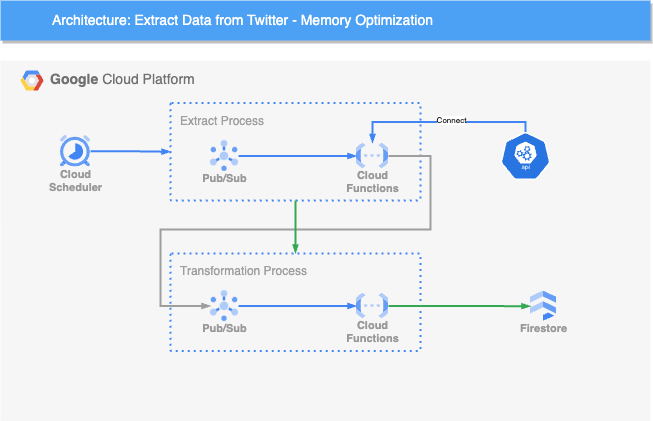

*Nota: si no se puede ver el archivo es challenge-memory-optimization.png*

En el proceso de extraccion consideramos un set de datos pequeños que se puede procesar en menos de 9 minutos, si no planteamos un proceso que va estar siempre encendido o que dura más de 9 min podemos considerar otro tipo de servicios como DataFlow o un Cloud Engine. Entre estos dos ultimos el más óptimo el Dataflow por la forma como procesa los datos e incluso se pueden realizar las transformacion en el mismo flujo.

Con respecto a la transformacion, los datos ingresaran al Pubsub fila por fila y se encolaran para que se envien de esa forma a la Cloud Function de transformación para que finalmente se almacene en Firestore.

Se escogio esta base de datos porque tenemos una estructura semiestructurada y que nos permitira actualizarla si es necesaria.

*Nota: si no se puede ver el archivo es challenge-time-optimization.png*

Para esta arquitectura, no tenemos mucho cambio en el proceso de extracción; sin embargo, para el caso que supere las condiciones de poder usar una Cloud Function podemos utilizar el servicio de Dataproc Severless para optimizar procesamiento y costo. Tambien hay que tener en cuenta que debemos de cambiar la logica utilizando PySpark.

Con respecto a la transformacion, vamos a leer todos los datos extraidos de la API en un archivo json. Asi mismo, esta arquitectura inicial se puede optimizar mucho considerando factores reales y pruebas de estres de esta extraccion.

# Desarrollo

## Librerias

Se usara el modulo `unicodedata` para decodificar los codigos en JS de simbolos y emojis. 
Tambien usaremos el modulo `emoji` para aprovechar unas clases que nos facilitaran la manipulacion de estos datos caracteristicos. Es necesario instalarlo ya que no es nativo de python. Además, la subclase `Counter` del módulo `collections` en Python es una subclase de diccionario utilizada para contar objetos hashables. Es una colección donde los elementos son almacenados como claves de diccionario y sus recuentos respectivos como valores del diccionario.

In [ ]:
import json
import unicodedata

import emoji

from collections import Counter
from typing import List, Tuple

In [ ]:
# Pregunta 2
def q2_time(file_path: str) -> List[Tuple[str, int]]:
    """
    Función para contar los emojis más usados en un conjunto de tweets.
    Esta función se optimiza para el tiempo, cargando todos los emojis en memoria antes de calcular los más comunes.
    
    Args:
        file_path: Ruta al archivo JSON que contiene los tweets.
        
    Returns:
        Una lista de tuplas que contiene los 10 emojis más comunes y sus respectivos conteos.
    """
    emoji_count = Counter()
    
    with open(file_path, 'r') as file:
        for line in file:
            tweet = json.loads(line)
            # Normalizando y decodificando el texto del tweet para identificar correctamente los emojis
            tweet_text = unicodedata.normalize('NFKD', tweet.get('content', '')).encode('utf-16', 'surrogatepass').decode('utf-16')
            
            # Obteniendo la lista de emojis del texto del tweet
            emoji_pattern = list(map(lambda x: x['emoji'], emoji.emoji_list(tweet_text)))
            
            # Contando la ocurrencia de cada emoji
            for char in emoji_pattern:
                emoji_count[char] += 1
                    
    return emoji_count.most_common(10)

def q2_memory(file_path: str) -> List[Tuple[str, int]]:
    """
    Función para contar los emojis más usados en un conjunto de tweets.
    Esta función se optimiza para la memoria, calculando los emojis más comunes sin cargar todos en memoria.
    
    Args:
        file_path: Ruta al archivo JSON que contiene los tweets.
        
    Returns:
        Una lista de tuplas que contiene los 10 emojis más comunes y sus respectivos conteos.
    """
    emoji_count = Counter()
    
    with open(file_path, 'r') as file:
        for line in file:
            tweet = json.loads(line)
            # Normalizando y decodificando el texto del tweet para identificar correctamente los emojis
            tweet_text = unicodedata.normalize('NFKD', tweet.get('content', '')).encode('utf-16', 'surrogatepass').decode('utf-16')
            
            # Obteniendo la lista de emojis del texto del tweet
            emoji_pattern = list(map(lambda x: x['emoji'], emoji.emoji_list(tweet_text)))
            
            # Contando la ocurrencia de cada emoji
            for char in emoji_pattern:
                emoji_count[char] += 1
    
    # Calculando los top 10 emojis sin almacenar la lista completa en memoria
    top_10_emojis = []
    for em, count in emoji_count.items():
        if len(top_10_emojis) < 10:
            top_10_emojis.append((em, count))
            top_10_emojis.sort(key=lambda x: x[1], reverse=True)
        elif count > top_10_emojis[-1][1]:
            top_10_emojis[-1] = (em, count)
            top_10_emojis.sort(key=lambda x: x[1], reverse=True)
            
    return top_10_emojis
    

# Ejecución

Vamos a definir el path del archivo

In [ ]:
file_path = "farmers-protest-tweets-2021-2-4.json"

Ejecutando optimizando el tiempo

In [ ]:
q2_time(file_path)

Ejecutando optimizando la memoria

In [ ]:
q2_memory(file_path)